<a href="https://colab.research.google.com/github/GhazaleZe/Machine-learning-for-optimal-portfolios/blob/main/CompAss4_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive 

In [1]:
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np


def reading_data():
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

  #F-F Research data factors
  file_id = '1JqjCLhMszamzs3_ihpqCVFskcZYicXYy' 


  download = drive.CreateFile({'id': file_id})

  #F-F Research data factors daily

  file_id_d = '1In0NkXHqz-QRlfivTTDaAbE2QFCrzZt6' 


  download_daily = drive.CreateFile({'id': file_id_d})

  # predicator 

  file_id_p = '1yyVF3ilhlD-GDc08BL2k_VJfLiUsbpEF'
  
  ## reading data
  download_predictor = drive.CreateFile({'id': file_id_p})
  download.GetContentFile('F-F_Research_Data_Factors.CSV')
  FF_monthly_df  = pd.read_csv("F-F_Research_Data_Factors.CSV")
  FF_monthly_df = FF_monthly_df [FF_monthly_df['Year_Month']>='192701']
  FF_monthly_df= FF_monthly_df.dropna()
  FF_monthly_df['Year_Month'] = FF_monthly_df['Year_Month'].astype(int)
  FF_monthly_df = FF_monthly_df [(FF_monthly_df['Year_Month']>=192701) & (FF_monthly_df['Year_Month']<202201)]
  FF_monthly_df['Year_Month'] = FF_monthly_df['Year_Month'].astype(str)
  FF_monthly_df.sort_values('Year_Month', ascending=True)

  FF_monthly_df['Mkt-RF']= FF_monthly_df['Mkt-RF'].astype(float)/100
  FF_monthly_df['RF']= FF_monthly_df['RF'].astype(float)/100

  download_daily.GetContentFile('F-F_Research_Data_Factors_daily.CSV')

  FF_daily_df  = pd.read_csv("F-F_Research_Data_Factors_daily.CSV")
  FF_daily_df = FF_daily_df.dropna()
  FF_daily_df['Mkt-RF']= FF_daily_df['Mkt-RF'].astype(float)/100
  FF_daily_df['RF']= FF_daily_df['RF'].astype(float)/100
  FF_daily_df['MKt'] = FF_daily_df['Mkt-RF'] + FF_daily_df['RF']
  #FF_daily_df['YYMMDD'] = FF_daily_df['YYMMDD'].astype(int)
  FF_daily_df = FF_daily_df [(FF_daily_df['YYMMDD']>= '19270101') & (FF_daily_df['YYMMDD'] <= '20211231')]

  download_predictor.GetContentFile('PredictorData2021Monthly.csv')
  Predictore_df  = pd.read_csv("PredictorData2021Monthly.csv")

  Predictore_df = Predictore_df[Predictore_df['yyyymm']>=192701]
  # delete column csp
  Predictore_df = Predictore_df.drop('csp' , axis=1)

  return FF_daily_df, FF_monthly_df, Predictore_df



FF_daily_df, FF_monthly_df, Predictore_df = reading_data()


FF_daily_df


,YYMMDD,Mkt-RF,SMB,HML,RF,MKt
150,19270103,-0.0079,0.19,0.09,0.0001,-0.0078
151,19270104,0.0031,0.14,-0.66,0.0001,0.0032
152,19270105,0.0014,0.46,-0.36,0.0001,0.0015
153,19270106,-0.0017,-0.05,0.15,0.0001,-0.0016
154,19270107,0.0030,-0.23,0.41,0.0001,0.0031
...,...,...,...,...,...,...
25143,20211227,0.0122,-0.11,0.29,0.0000,0.0122
25144,20211228,-0.0027,-0.60,0.81,0.0000,-0.0027
25145,20211229,0.0006,-0.07,0.17,0.0000,0.0006
25146,20211230,-0.0015,0.10,-0.40,0.0000,-0.0015


In [2]:
FF_monthly_df

,Year_Month,Mkt-RF,SMB,HML,RF
6,192701,-0.0006,-0.37,4.54,0.0025
7,192702,0.0418,0.04,2.94,0.0026
8,192703,0.0013,-1.65,-2.61,0.0030
9,192704,0.0046,0.3,0.81,0.0025
10,192705,0.0544,1.53,4.73,0.0030
...,...,...,...,...,...
1141,202108,0.0291,-0.43,-0.15,0.0000
1142,202109,-0.0437,0.72,5.09,0.0000
1143,202110,0.0665,-2.34,-0.49,0.0000
1144,202111,-0.0155,-1.32,-0.45,0.0000


## This is not the main function

In [57]:
def extract_monthly_volitility(FF_daily_df):
  df_volitility_daily = pd.DataFrame(columns=['YYYYMM', 'Volatility','SD'])
  #def volatility_from_daily(df):
  year_index = np.arange(1927, 2022, 1)
  month_index = [f'{i:02}' for i in range(1, 13)]
  FF_daily_df['year'] = FF_daily_df['YYMMDD'].str[:4]
  FF_daily_df['month'] = FF_daily_df['YYMMDD'].str[4:6]
  FF_daily_df['day'] = FF_daily_df['YYMMDD'].str[6:]
  
  #FF_daily_df.head(50)
  for year in year_index:
    for month in month_index:
      sub_set_daily = FF_daily_df[(FF_daily_df['year']==str(year)) & (FF_daily_df['month']==str(month))]
      subset_copy = sub_set_daily.copy()
      subset_copy['Mkt-RF'] = subset_copy['Mkt-RF'].apply(lambda x: x**2)
      sub_set_daily = subset_copy
      new_index = len(df_volitility_daily) + 1
      if month == '12':
        df_volitility_daily.loc[new_index] = [str(year+1)+'01', sub_set_daily['Mkt-RF'].sum()/len(sub_set_daily['Mkt-RF']), round(np.sqrt(sub_set_daily['Mkt-RF'].sum()/len(sub_set_daily['Mkt-RF'])),3)]
      elif month <'09':
        df_volitility_daily.loc[new_index] = [str(year)+ '0' +str(int(month)+1), sub_set_daily['Mkt-RF'].sum()/len(sub_set_daily['Mkt-RF']), round(np.sqrt(sub_set_daily['Mkt-RF'].sum()/len(sub_set_daily['Mkt-RF'])),3)]
      else:
        df_volitility_daily.loc[new_index] = [str(year)+str(int(month)+1), sub_set_daily['Mkt-RF'].sum()/len(sub_set_daily['Mkt-RF']),round(np.sqrt(sub_set_daily['Mkt-RF'].sum()/len(sub_set_daily['Mkt-RF'])),3)]

  df_volitility_daily.to_csv('volitility_daily.csv', index=False)
  return df_volitility_daily

df_volitility_daily=extract_monthly_volitility(FF_daily_df)
df_volitility_daily

,YYYYMM,Volatility,SD
1,192702,0.000017,0.004
2,192703,0.000010,0.003
3,192704,0.000032,0.006
4,192705,0.000023,0.005
5,192706,0.000014,0.004
...,...,...,...
1136,202109,0.000031,0.006
1137,202110,0.000070,0.008
1138,202111,0.000060,0.008
1139,202112,0.000067,0.008


In [3]:
def extract_monthly_volitility_mean(FF_daily_df):
  df_volitility_daily = pd.DataFrame(columns=['YYYYMM', 'Volatility','SD'])
  #def volatility_from_daily(df):
  year_index = np.arange(1989, 2022, 1)
  month_index = [f'{i:02}' for i in range(1, 13)]
  FF_daily_df['year'] = FF_daily_df['YYMMDD'].str[:4]
  FF_daily_df['month'] = FF_daily_df['YYMMDD'].str[4:6]
  FF_daily_df['day'] = FF_daily_df['YYMMDD'].str[6:]
  mean_list =[]
  #FF_daily_df.head(50)
  for year in year_index:
    for month in month_index:
      sub_set_daily = FF_daily_df[(FF_daily_df['year']==str(year)) & (FF_daily_df['month']==str(month))]
      subset_copy1 = sub_set_daily.copy()
      subset_copy1['Mkt-RF'] = subset_copy1['Mkt-RF'] - (subset_copy1['Mkt-RF'].mean())
      #print (subset_copy1['Mkt-RF'].mean())
      mean_list.append(subset_copy1['Mkt-RF'].mean())
      sub_set_daily = subset_copy1

      subset_copy = sub_set_daily.copy()
      subset_copy['Mkt-RF'] = subset_copy['Mkt-RF'].astype(float).apply(lambda x: x**2)
      sub_set_daily = subset_copy
      new_index = len(df_volitility_daily) + 1
      if month == '12':
        df_volitility_daily.loc[new_index] = [str(year+1)+'01', sub_set_daily['Mkt-RF'].sum(), np.sqrt(sub_set_daily['Mkt-RF'].sum()/len(sub_set_daily['Mkt-RF']))]
      elif month <'09':
        df_volitility_daily.loc[new_index] = [str(year)+ '0' +str(int(month)+1), sub_set_daily['Mkt-RF'].sum(), np.sqrt(sub_set_daily['Mkt-RF'].sum()/len(sub_set_daily['Mkt-RF']))]
      else:
        df_volitility_daily.loc[new_index] = [str(year)+str(int(month)+1), sub_set_daily['Mkt-RF'].sum(),round(np.sqrt(sub_set_daily['Mkt-RF'].sum()/len(sub_set_daily['Mkt-RF'])),3)]

  df_volitility_daily.to_csv('volitility_daily_mean.csv', index=False)
  print("this is mean of means :", np.mean(mean_list))
  return df_volitility_daily

df_volitility_daily = extract_monthly_volitility_mean(FF_daily_df)
df_volitility_daily

this is mean of means : 8.138172964127779e-21


,YYYYMM,Volatility,SD
1,198902,0.000531,0.005030
2,198903,0.000818,0.006560
3,198904,0.000968,0.006635
4,198905,0.000503,0.005015
5,198906,0.000672,0.005525
...,...,...,...
392,202109,0.000649,0.005432
393,202110,0.001382,0.008000
394,202111,0.001062,0.007000
395,202112,0.001400,0.008000


In [4]:
def window_w_base(FF_monthly_df,df_volitility_daily):
  joined_monthly = pd.merge(FF_monthly_df,df_volitility_daily, left_on='Year_Month', right_on='YYYYMM', how='inner')
  window = 60
  gama = 4
  joined_monthly_df = joined_monthly
  joined_monthly_df['w_base'] = None
 
  for i in range(len(joined_monthly['Year_Month'])-window):
    
    sub_set_monthly = joined_monthly.iloc[i:i+ window, :]
    #joined_monthly_df['Sum_base'][] = sub_set_monthly['Mkt-RF'].sum()
    voli = joined_monthly_df.loc[i+window, 'Volatility']
    #print(voli)
    
    joined_monthly_df.iloc[i+ window, joined_monthly_df.columns.get_loc('w_base')] = sub_set_monthly['Mkt-RF'].sum()/(window * gama * voli)
  return joined_monthly_df

joined_monthly_df = window_w_base(FF_monthly_df,df_volitility_daily)
#cjoined_monthly_df = joined_monthly_df[cjoined_monthly_df['Year_Month']>'198901'].copy()
joined_monthly_df

,Year_Month,Mkt-RF,SMB,HML,RF,YYYYMM,Volatility,SD,w_base
0,198902,-0.0225,2.82,1.01,0.0061,198902,0.000531,0.005030,None
1,198903,0.0157,0.67,0.58,0.0067,198903,0.000818,0.006560,None
2,198904,0.0433,-0.68,-1.42,0.0067,198904,0.000968,0.006635,None
3,198905,0.0335,-0.05,-0.88,0.0079,198905,0.000503,0.005015,None
4,198906,-0.0135,-1.02,2.25,0.0071,198906,0.000672,0.005525,None
...,...,...,...,...,...,...,...,...,...
390,202108,0.0291,-0.43,-0.15,0.0000,202108,0.001182,0.007504,2.980337
391,202109,-0.0437,0.72,5.09,0.0000,202109,0.000649,0.005432,5.585184
392,202110,0.0665,-2.34,-0.49,0.0000,202110,0.001382,0.008000,2.484334
393,202111,-0.0155,-1.32,-0.45,0.0000,202111,0.001062,0.007000,3.570992


In [5]:
def window_w_base_cumulative(FF_monthly_df,df_volitility_daily):

  cjoined_monthly = pd.merge(FF_monthly_df,df_volitility_daily, left_on='Year_Month', right_on='YYYYMM', how='inner')
  gama = 6
  cjoined_monthly_df = cjoined_monthly
  cjoined_monthly_df['w_base'] = None
 
  for i in range(1,len(cjoined_monthly['Year_Month'])):

    csub_set_monthly = cjoined_monthly.iloc[0:i, :]

    #joined_monthly_df['Sum_base'][] = sub_set_monthly['Mkt-RF'].sum()
    cvoli = cjoined_monthly_df.loc[i, 'Volatility']
    #print(cvoli)
    
    cjoined_monthly_df.iloc[i, cjoined_monthly_df.columns.get_loc('w_base')] = csub_set_monthly['Mkt-RF'].sum()/(i * gama * cvoli)
  return cjoined_monthly_df

cjoined_monthly_df = window_w_base_cumulative(FF_monthly_df,df_volitility_daily)
cjoined_monthly_df

,Year_Month,Mkt-RF,SMB,HML,RF,YYYYMM,Volatility,SD,w_base
0,198902,-0.0225,2.82,1.01,0.0061,198902,0.000531,0.005030,None
1,198903,0.0157,0.67,0.58,0.0067,198903,0.000818,0.006560,-4.586796
2,198904,0.0433,-0.68,-1.42,0.0067,198904,0.000968,0.006635,-0.585114
3,198905,0.0335,-0.05,-0.88,0.0079,198905,0.000503,0.005015,4.031223
4,198906,-0.0135,-1.02,2.25,0.0071,198906,0.000672,0.005525,4.342672
...,...,...,...,...,...,...,...,...,...
390,202108,0.0291,-0.43,-0.15,0.0000,202108,0.001182,0.007504,1.058264
391,202109,-0.0437,0.72,5.09,0.0000,202109,0.000649,0.005432,1.942213
392,202110,0.0665,-2.34,-0.49,0.0000,202110,0.001382,0.008000,0.896586
393,202111,-0.0155,-1.32,-0.45,0.0000,202111,0.001062,0.007000,1.189617


In [6]:
def leverage_for_w(cjoined_monthly_df):
  mask = cjoined_monthly_df['w_base']>1.5
  cjoined_monthly_df.loc[mask, 'w_base'] = 1.5
  mask1 = cjoined_monthly_df['w_base'] <0
  cjoined_monthly_df.loc[mask1, 'w_base'] = 0
  #cjoined_monthly_df[(cjoined_monthly_df['w_base']<=2) & (cjoined_monthly_df['w_base']>=-2)]
  cjoined_monthly_df
  return cjoined_monthly_df

cjoined_monthly_df = leverage_for_w(cjoined_monthly_df)
cjoined_monthly_df

,Year_Month,Mkt-RF,SMB,HML,RF,YYYYMM,Volatility,SD,w_base
0,198902,-0.0225,2.82,1.01,0.0061,198902,0.000531,0.005030,None
1,198903,0.0157,0.67,0.58,0.0067,198903,0.000818,0.006560,0
2,198904,0.0433,-0.68,-1.42,0.0067,198904,0.000968,0.006635,0
3,198905,0.0335,-0.05,-0.88,0.0079,198905,0.000503,0.005015,1.5
4,198906,-0.0135,-1.02,2.25,0.0071,198906,0.000672,0.005525,1.5
...,...,...,...,...,...,...,...,...,...
390,202108,0.0291,-0.43,-0.15,0.0000,202108,0.001182,0.007504,1.058264
391,202109,-0.0437,0.72,5.09,0.0000,202109,0.000649,0.005432,1.5
392,202110,0.0665,-2.34,-0.49,0.0000,202110,0.001382,0.008000,0.896586
393,202111,-0.0155,-1.32,-0.45,0.0000,202111,0.001062,0.007000,1.189617


In [7]:
#cjoined_monthly_df = cjoined_monthly_df.drop('YYYYMM', axis=1)
cjoined_monthly_df ['Mkt'] = cjoined_monthly_df['Mkt-RF'] + cjoined_monthly_df['RF']
cjoined_monthly_df ['return'] = (cjoined_monthly_df['Mkt'] * cjoined_monthly_df['w_base']) + (cjoined_monthly_df['RF']*(1-cjoined_monthly_df['w_base']))
cjoined_monthly_df

,Year_Month,Mkt-RF,SMB,HML,RF,YYYYMM,Volatility,SD,w_base,Mkt,return
0,198902,-0.0225,2.82,1.01,0.0061,198902,0.000531,0.005030,None,-0.0164,NaN
1,198903,0.0157,0.67,0.58,0.0067,198903,0.000818,0.006560,0,0.0224,0.0067
2,198904,0.0433,-0.68,-1.42,0.0067,198904,0.000968,0.006635,0,0.0500,0.0067
3,198905,0.0335,-0.05,-0.88,0.0079,198905,0.000503,0.005015,1.5,0.0414,0.05815
4,198906,-0.0135,-1.02,2.25,0.0071,198906,0.000672,0.005525,1.5,-0.0064,-0.01315
...,...,...,...,...,...,...,...,...,...,...,...
390,202108,0.0291,-0.43,-0.15,0.0000,202108,0.001182,0.007504,1.058264,0.0291,0.030795
391,202109,-0.0437,0.72,5.09,0.0000,202109,0.000649,0.005432,1.5,-0.0437,-0.06555
392,202110,0.0665,-2.34,-0.49,0.0000,202110,0.001382,0.008000,0.896586,0.0665,0.059623
393,202111,-0.0155,-1.32,-0.45,0.0000,202111,0.001062,0.007000,1.189617,-0.0155,-0.018439


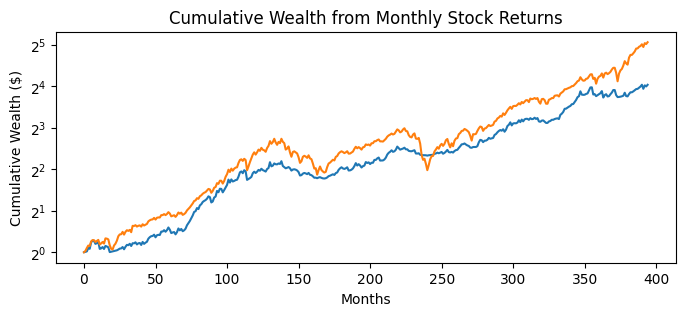

In [8]:
import matplotlib.pyplot as plt

initial_investment = 1.0

# Calculate cumulative return over time
cumulative_return = np.zeros(len(cjoined_monthly_df.Year_Month) )
cumulative_return_bh = np.zeros(len(cjoined_monthly_df.Year_Month) )
cumulative_return[0] = initial_investment
cumulative_return_bh[0] = initial_investment
for i in range(1, len(cjoined_monthly_df.Year_Month)):
   
    cumulative_return[i] = (cumulative_return[i-1] * (1 + cjoined_monthly_df.loc[i,'return']))
    cumulative_return_bh[i] = cumulative_return_bh[i-1] *(1+ cjoined_monthly_df.loc[i,'Mkt'])

# Convert cumulative return to cumulative wealth
cumulative_wealth = cumulative_return * initial_investment
cumulative_wealth_bh = cumulative_return_bh * initial_investment

# Plot results
#years = cjoined_monthly_df['Year_Month'].str[:4]

months = np.arange(len(cjoined_monthly_df.Year_Month) )
#plt.plot(months, cumulative_wealth)

fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(months , cumulative_wealth)
ax.set_yscale('log',base=2)
ax.plot(months, cumulative_wealth_bh)
plt.title('Cumulative Wealth from Monthly Stock Returns')
plt.xlabel('Months')
plt.ylabel('Cumulative Wealth ($)')
#plt.yscale('log')
plt.show()

# Random Forest Starts here

In [10]:
pre_df = pd.read_csv("predictor.csv")
pre_df = pre_df.drop('Unnamed: 0' , axis=1)
pre_df['Year_Month']= pre_df['Year_Month'].astype(str)
pre_df

,Year_Month,d/p,e/p,bm,ntis,tbl,ltr,dfy,tms,infl,corpr,svar,lag_ex_ret
0,192701,-2.942374,-2.374773,0.443706,0.050824,0.0323,0.0075,0.0095,-0.0248,-0.011299,0.0056,0.000470,0.045091
1,192702,-2.979535,-2.430353,0.428501,0.051668,0.0329,0.0088,0.0092,-0.0241,-0.005714,0.0069,0.000287,0.003503
2,192703,-2.976535,-2.445079,0.469765,0.046357,0.0320,0.0253,0.0092,-0.0067,-0.005747,0.0083,0.000924,0.014729
3,192704,-2.984225,-2.471309,0.456754,0.050514,0.0339,-0.0005,0.0090,-0.0344,0.000000,0.0055,0.000603,0.049223
4,192705,-3.025963,-2.531446,0.434783,0.055275,0.0333,0.0109,0.0093,-0.0224,0.005780,-0.0011,0.000392,-0.011990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,202108,-4.342866,-3.282043,0.184756,0.014846,0.0005,-0.0035,0.0069,-0.0040,0.002066,-0.0045,0.000602,-0.047569
1136,202109,-4.286281,-3.201224,0.193036,0.015598,0.0004,-0.0250,0.0070,-0.0254,0.002716,-0.0194,0.001393,0.069144
1137,202110,-4.346731,-3.226260,0.182389,0.013368,0.0005,0.0051,0.0067,0.0046,0.008308,0.0159,0.001151,-0.008434
1138,202111,-4.331997,-3.177747,0.189455,0.015640,0.0005,0.0210,0.0066,0.0205,0.004913,0.0094,0.001327,0.043613


## Can month separately be one of the factors?

In [11]:
Predictore_df = pd.merge(pre_df,FF_monthly_df, left_on='Year_Month', right_on='Year_Month', how='inner')

Predictore_df = Predictore_df.drop(['SMB','HML','RF'] , axis=1)
Predictore_df['lag_ex_ret'] = Predictore_df['Mkt-RF'].shift(-1)
Predictore_df

,Year_Month,d/p,e/p,bm,ntis,tbl,ltr,dfy,tms,infl,corpr,svar,lag_ex_ret,Mkt-RF
0,192701,-2.942374,-2.374773,0.443706,0.050824,0.0323,0.0075,0.0095,-0.0248,-0.011299,0.0056,0.000470,0.0418,-0.0006
1,192702,-2.979535,-2.430353,0.428501,0.051668,0.0329,0.0088,0.0092,-0.0241,-0.005714,0.0069,0.000287,0.0013,0.0418
2,192703,-2.976535,-2.445079,0.469765,0.046357,0.0320,0.0253,0.0092,-0.0067,-0.005747,0.0083,0.000924,0.0046,0.0013
3,192704,-2.984225,-2.471309,0.456754,0.050514,0.0339,-0.0005,0.0090,-0.0344,0.000000,0.0055,0.000603,0.0544,0.0046
4,192705,-3.025963,-2.531446,0.434783,0.055275,0.0333,0.0109,0.0093,-0.0224,0.005780,-0.0011,0.000392,-0.0234,0.0544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,202108,-4.342866,-3.282043,0.184756,0.014846,0.0005,-0.0035,0.0069,-0.0040,0.002066,-0.0045,0.000602,-0.0437,0.0291
1136,202109,-4.286281,-3.201224,0.193036,0.015598,0.0004,-0.0250,0.0070,-0.0254,0.002716,-0.0194,0.001393,0.0665,-0.0437
1137,202110,-4.346731,-3.226260,0.182389,0.013368,0.0005,0.0051,0.0067,0.0046,0.008308,0.0159,0.001151,-0.0155,0.0665
1138,202111,-4.331997,-3.177747,0.189455,0.015640,0.0005,0.0210,0.0066,0.0205,0.004913,0.0094,0.001327,0.0310,-0.0155


In [12]:
train_Predictore_df = Predictore_df[Predictore_df['Year_Month'] <'195801']
valid_Predictore_df = Predictore_df[(Predictore_df['Year_Month'] >= '195801') & (Predictore_df['Year_Month'] <'198901')]
test_Predictore_df = Predictore_df[Predictore_df['Year_Month'] >= '198901']
train_Predictore_df

,Year_Month,d/p,e/p,bm,ntis,tbl,ltr,dfy,tms,infl,corpr,svar,lag_ex_ret,Mkt-RF
0,192701,-2.942374,-2.374773,0.443706,0.050824,0.0323,0.0075,0.0095,-0.0248,-0.011299,0.0056,0.000470,0.0418,-0.0006
1,192702,-2.979535,-2.430353,0.428501,0.051668,0.0329,0.0088,0.0092,-0.0241,-0.005714,0.0069,0.000287,0.0013,0.0418
2,192703,-2.976535,-2.445079,0.469765,0.046357,0.0320,0.0253,0.0092,-0.0067,-0.005747,0.0083,0.000924,0.0046,0.0013
3,192704,-2.984225,-2.471309,0.456754,0.050514,0.0339,-0.0005,0.0090,-0.0344,0.000000,0.0055,0.000603,0.0544,0.0046
4,192705,-3.025963,-2.531446,0.434783,0.055275,0.0333,0.0109,0.0093,-0.0224,0.005780,-0.0011,0.000392,-0.0234,0.0544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,195708,-3.251924,-2.572209,0.588005,0.035854,0.0337,0.0002,0.0072,-0.0335,0.000000,-0.0009,0.002147,-0.0598,-0.0511
368,195709,-3.182306,-2.503465,0.624151,0.034363,0.0353,0.0076,0.0081,-0.0277,0.000000,0.0095,0.001517,-0.0432,-0.0598
369,195710,-3.144055,-2.480523,0.645746,0.038410,0.0358,-0.0050,0.0089,-0.0408,0.000000,0.0023,0.004936,0.0230,-0.0432
370,195711,-3.154367,-2.506235,0.633072,0.040990,0.0331,0.0533,0.0101,0.0202,0.003534,0.0311,0.003490,-0.0391,0.0230


In [19]:
train_Predictore_df.corr()


<ipython-input-19-cdc002c98b33>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_Predictore_df.corr()


,d/p,e/p,bm,ntis,tbl,ltr,dfy,tms,infl,corpr,svar,lag_ex_ret,Mkt-RF
d/p,1.000000,0.608609,0.760737,-0.320220,-0.322235,0.032840,0.437679,0.248447,-0.157220,-0.062467,0.323684,0.085376,-0.180393
e/p,0.608609,1.000000,0.341213,-0.186075,-0.045942,-0.031019,-0.301894,0.010826,0.070966,-0.147751,-0.227966,0.112257,-0.104938
bm,0.760737,0.341213,1.000000,-0.638798,-0.498136,0.057071,0.524200,0.388412,-0.085977,-0.005318,0.387116,0.171637,-0.073870
ntis,-0.320220,-0.186075,-0.638798,1.000000,0.603099,-0.000943,-0.287568,-0.423301,-0.093565,0.036909,-0.033162,-0.132139,-0.137183
tbl,-0.322235,-0.045942,-0.498136,0.603099,1.000000,-0.035462,-0.327664,-0.725231,-0.125234,-0.081593,-0.105701,-0.039843,-0.039570
ltr,0.032840,-0.031019,0.057071,-0.000943,-0.035462,1.000000,0.100745,0.713791,-0.123331,0.457494,0.041111,-0.020390,0.087088
dfy,0.437679,-0.301894,0.524200,-0.287568,-0.327664,0.100745,1.000000,0.299034,-0.316167,0.073721,0.663293,0.052011,-0.038312
tms,0.248447,0.010826,0.388412,-0.423301,-0.725231,0.713791,0.299034,1.000000,0.002797,0.372366,0.102399,0.013874,0.087729
infl,-0.157220,0.070966,-0.085977,-0.093565,-0.125234,-0.123331,-0.316167,0.002797,1.000000,-0.042338,-0.202222,-0.028093,0.057983
corpr,-0.062467,-0.147751,-0.005318,0.036909,-0.081593,0.457494,0.073721,0.372366,-0.042338,1.000000,0.039249,0.006548,0.177621


In [14]:
import itertools
all_columns = train_Predictore_df.columns.tolist()
all_columns.remove('Year_Month')
all_columns.remove('Mkt-RF')
all_columns.remove('tms')
all_columns.remove('bm')
max_subset_size = 9
min_subset_size =5

# Create a list of all possible column subsets
column_subsets = []
for subset_size in range(min_subset_size, max_subset_size+1):
    subsets = itertools.combinations(all_columns, subset_size)
    column_subsets.extend([list(subset) for subset in subsets])

# Print the list of column subsets
for i in range(6,9,2):
  length_to_delete = i

  # Delete the lists with the specified length
  column_subsets = [lst for lst in column_subsets if len(lst) != length_to_delete]
print(column_subsets)
print(len(column_subsets))

[['d/p', 'e/p', 'ntis', 'tbl', 'ltr'], ['d/p', 'e/p', 'ntis', 'tbl', 'dfy'], ['d/p', 'e/p', 'ntis', 'tbl', 'infl'], ['d/p', 'e/p', 'ntis', 'tbl', 'corpr'], ['d/p', 'e/p', 'ntis', 'tbl', 'svar'], ['d/p', 'e/p', 'ntis', 'tbl', 'lag_ex_ret'], ['d/p', 'e/p', 'ntis', 'ltr', 'dfy'], ['d/p', 'e/p', 'ntis', 'ltr', 'infl'], ['d/p', 'e/p', 'ntis', 'ltr', 'corpr'], ['d/p', 'e/p', 'ntis', 'ltr', 'svar'], ['d/p', 'e/p', 'ntis', 'ltr', 'lag_ex_ret'], ['d/p', 'e/p', 'ntis', 'dfy', 'infl'], ['d/p', 'e/p', 'ntis', 'dfy', 'corpr'], ['d/p', 'e/p', 'ntis', 'dfy', 'svar'], ['d/p', 'e/p', 'ntis', 'dfy', 'lag_ex_ret'], ['d/p', 'e/p', 'ntis', 'infl', 'corpr'], ['d/p', 'e/p', 'ntis', 'infl', 'svar'], ['d/p', 'e/p', 'ntis', 'infl', 'lag_ex_ret'], ['d/p', 'e/p', 'ntis', 'corpr', 'svar'], ['d/p', 'e/p', 'ntis', 'corpr', 'lag_ex_ret'], ['d/p', 'e/p', 'ntis', 'svar', 'lag_ex_ret'], ['d/p', 'e/p', 'tbl', 'ltr', 'dfy'], ['d/p', 'e/p', 'tbl', 'ltr', 'infl'], ['d/p', 'e/p', 'tbl', 'ltr', 'corpr'], ['d/p', 'e/p', 'tbl',

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
#x_train = train_Predictore_df.iloc[:,1:13]


r_squared_list=[]
for subset in column_subsets:
    # Subset the DataFrame to include only the columns in the current subset

    x_train = train_Predictore_df[subset]
    y_train = train_Predictore_df.iloc[:,13]
    # Split the data into predictors and target
    x_valid = valid_Predictore_df[subset]
    y_valid = valid_Predictore_df.iloc[:,13]
    
    # Build a Random Forest Regressor model
    regressor = RandomForestRegressor()
    regressor.fit(x_train, y_train)    
    y_pred = regressor.predict(x_valid)
    #mse = mean_squared_error(y_valid, y_pred)
    r2 = r2_score(y_valid, y_pred)
    r_squared_list.append(r2)
    #print("Mean Squared Error:", mse)
    #accuracy = accuracy_score(y_valid, y_pred)
    #accuracy = regressor.score(x_valid, y_valid)
    #print("Accuracy:", accuracy)


In [231]:
print(max(r_squared_list))
max_index = r_squared_list.index(max(r_squared_list))
winer_subset = column_subsets[max_index]
print(winer_subset)

0.08651325399250398
['ntis', 'dfy', 'corpr', 'svar', 'lag_ex_ret']


In [235]:
x_train = train_Predictore_df[winer_subset]
y_train = train_Predictore_df.iloc[:,13]

x_valid = valid_Predictore_df[winer_subset]
y_valid = valid_Predictore_df.iloc[:,13]
      
best_depth = []
for k in range(1,20):
  regressor = RandomForestRegressor(n_estimators=100, max_depth = k,max_features=5)
  regressor.fit(x_train, y_train)    
  y_pred = regressor.predict(x_valid)
        #mse = mean_squared_error(y_valid, y_pred)
  r2 = r2_score(y_valid, y_pred)
  best_depth.append(r2)
print(best_depth)
print(max(best_depth))
print(best_depth.index(max(best_depth)))

[0.035111616940002754, 0.029001034401544223, -0.12004856773250006, -0.04849050865002558, -0.020035565233664565, 0.012535763253304522, 0.007762222376149319, 0.0005525675061158752, 0.0440973318580592, 0.027554320956880818, 0.03432739557706599, 0.08766106377830396, -0.019812929386639144, 0.05097052934359958, 0.001653233273143373, 0.025374897713839828, 0.02325143361821269, 0.07092778826367163, 0.07289157115798606]
0.08766106377830396
11


RandomForestRegressor(max_depth=6, random_state=0)

In [201]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = regressor.predict(x_valid)
mse = mean_squared_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)



print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.0023366832489026923
R-squared: -0.18150927138497996


,Year_Month,d/p,e/p,bm,ntis,tbl,ltr,dfy,tms,infl,corpr,svar,lag_ex_ret
0,192701,-2.942374,-2.374773,0.443706,0.050824,0.0323,0.0075,0.0095,-0.0248,-0.011299,0.0056,0.000470,0.0418
1,192702,-2.979535,-2.430353,0.428501,0.051668,0.0329,0.0088,0.0092,-0.0241,-0.005714,0.0069,0.000287,0.0013
2,192703,-2.976535,-2.445079,0.469765,0.046357,0.0320,0.0253,0.0092,-0.0067,-0.005747,0.0083,0.000924,0.0046
3,192704,-2.984225,-2.471309,0.456754,0.050514,0.0339,-0.0005,0.0090,-0.0344,0.000000,0.0055,0.000603,0.0544
4,192705,-3.025963,-2.531446,0.434783,0.055275,0.0333,0.0109,0.0093,-0.0224,0.005780,-0.0011,0.000392,-0.0234
...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,195708,-3.251924,-2.572209,0.588005,0.035854,0.0337,0.0002,0.0072,-0.0335,0.000000,-0.0009,0.002147,-0.0598
368,195709,-3.182306,-2.503465,0.624151,0.034363,0.0353,0.0076,0.0081,-0.0277,0.000000,0.0095,0.001517,-0.0432
369,195710,-3.144055,-2.480523,0.645746,0.038410,0.0358,-0.0050,0.0089,-0.0408,0.000000,0.0023,0.004936,0.0230
370,195711,-3.154367,-2.506235,0.633072,0.040990,0.0331,0.0533,0.0101,0.0202,0.003534,0.0311,0.003490,-0.0391


## Max Feature test

In [62]:
import math


x_train = train_Predictore_df.iloc[:,:13]
x_train = x_train.drop(['Year_Month','tms','bm'], axis=1)

y_train = train_Predictore_df.iloc[:,13]

x_valid = valid_Predictore_df.iloc[:,:13]
x_valid = x_valid.drop(['Year_Month','tms','bm'], axis=1)
y_valid = valid_Predictore_df.iloc[:,13]
      

maxfeatures = list(range(5, 12))
maxfeatures.append(int(math.sqrt(len(x_train.columns))))
maxfeatures.append(int(math.log2(len(x_train.columns)))+1)
dict_winner = {}
min_samples_split_list = [2,5,10]
best_min_samples_split_list=[]
estimator=[50,100,200,400,800]
for i in maxfeatures:
  best_depth = []
  for e in estimator:
    
    for j in min_samples_split_list:
      
      for k in range(1,20):
        regressor = RandomForestRegressor(n_estimators=100, max_depth = k,max_features=i,min_samples_split=j)
        regressor.fit(x_train, y_train)    
        y_pred = regressor.predict(x_valid)
              #mse = mean_squared_error(y_valid, y_pred)
        r2 = r2_score(y_valid, y_pred)
        best_depth.append([r2,j,k,e])
      
      
  dict_winner[i] = [max(best_depth)]

dict_winner

{5: [[0.05458104078135906, 2, 1, 50]],
 6: [[0.054271393377305466, 2, 1, 400]],
 7: [[0.05424723505458773, 2, 1, 800]],
 8: [[0.05135411353949282, 10, 1, 200]],
 9: [[0.05148916245532131, 2, 1, 100]],
 10: [[0.054325603568186276, 2, 1, 800]],
 11: [[0.05581715079073435, 10, 1, 200]],
 3: [[0.0683674700265191, 10, 4, 800]],
 4: [[0.055053163459815146, 2, 2, 100]]}

In [63]:
x_train

,d/p,e/p,ntis,tbl,ltr,dfy,infl,corpr,svar,lag_ex_ret
0,-2.942374,-2.374773,0.050824,0.0323,0.0075,0.0095,-0.011299,0.0056,0.000470,0.0418
1,-2.979535,-2.430353,0.051668,0.0329,0.0088,0.0092,-0.005714,0.0069,0.000287,0.0013
2,-2.976535,-2.445079,0.046357,0.0320,0.0253,0.0092,-0.005747,0.0083,0.000924,0.0046
3,-2.984225,-2.471309,0.050514,0.0339,-0.0005,0.0090,0.000000,0.0055,0.000603,0.0544
4,-3.025963,-2.531446,0.055275,0.0333,0.0109,0.0093,0.005780,-0.0011,0.000392,-0.0234
...,...,...,...,...,...,...,...,...,...,...
367,-3.251924,-2.572209,0.035854,0.0337,0.0002,0.0072,0.000000,-0.0009,0.002147,-0.0598
368,-3.182306,-2.503465,0.034363,0.0353,0.0076,0.0081,0.000000,0.0095,0.001517,-0.0432
369,-3.144055,-2.480523,0.038410,0.0358,-0.0050,0.0089,0.000000,0.0023,0.004936,0.0230
370,-3.154367,-2.506235,0.040990,0.0331,0.0533,0.0101,0.003534,0.0311,0.003490,-0.0391


Not for main code

In [47]:
# estimator=[50,100,200,400,800]
# r2_estimatore_list = []
# for e in estimator:
#   regressor = RandomForestRegressor(n_estimators=e, max_depth =10 ,max_features=3,min_samples_split=5)
#   regressor.fit(x_train, y_train)    
#   y_pred = regressor.predict(x_valid)
#             #mse = mean_squared_error(y_valid, y_pred)
#   r2 = r2_score(y_valid, y_pred)
#   r2_estimatore_list.append(r2)
# r2_estimatore_list

[0.04942884683417603,
 0.0026123921761630475,
 0.007928520888964563,
 0.05674289558671497,
 0.031524893788395514]

In [64]:
X_train_df = Predictore_df[Predictore_df['Year_Month'] <'198901']

test_Predictore_df = Predictore_df[Predictore_df['Year_Month'] >= '198901']
x_train_larg = X_train_df.iloc[:,:13]
x_train_larg = x_train_larg.drop(['Year_Month','tms','bm'], axis=1)

y_train_larg= X_train_df.iloc[:,13]
test_Predictore_df =test_Predictore_df.dropna()

x_test = test_Predictore_df.iloc[:,:13]
x_test = x_test.drop(['Year_Month','tms','bm'], axis=1)
y_test = test_Predictore_df.iloc[:,13]
r2_main_list = []
for i in dict_winner:
  regressor = RandomForestRegressor(n_estimators=dict_winner[i][0][3], max_depth = dict_winner[i][0][2],max_features=i,min_samples_split=dict_winner[i][0][1])
  regressor.fit(x_train_larg, y_train_larg)    
  y_pred_test = regressor.predict(x_test)

  r2_main = r2_score(y_test, y_pred_test)
  r2_main_list.append(r2_main)
r2_main_list

[0.04404100864302041,
 0.0364982339097486,
 0.03995845657159003,
 0.04249948650630975,
 0.03952488919485542,
 0.04200861369375408,
 0.045296708449764744,
 0.01171679179983054,
 0.06449711684056636]

In [56]:
for i in dict_winner:
  print(dict_winner[i][0][1])

10
10
2
10
5
2
2
10
